<a href="https://colab.research.google.com/github/iamslash/examplesofml/blob/master/pandas/pandas_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

# 한글폰트 사용시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [0]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                  [3, 4, np.nan, 1],
                  [np.nan, np.nan, np.nan, 5]],
                 columns=list('ABCD'))
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5


In [0]:
df.dropna(axis=1, how='any')

,D
0,0
1,1
2,5


In [0]:
df.dropna(axis=0, how='all')

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5


In [0]:
# NaN 을 0 으로 채운다.
df.fillna(0)

,A,B,C,D
0,0.0,2.0,0.0,0
1,3.0,4.0,0.0,1
2,0.0,0.0,0.0,5


# Make new columns


In [0]:
df = pd.DataFrame({'A': range(1, 11), 'B': np.random.randn(10)})
df

,A,B
0,1,-0.653768
1,2,0.578192
2,3,1.736728
3,4,-1.256863
4,5,-0.845115
5,6,-1.124894
6,7,0.185513
7,8,0.985732
8,9,0.724659
9,10,0.399328


In [0]:
df.assign?

In [0]:
df.assign(ln_A = lambda x: np.log(x.A)).head()

,A,B,ln_A
0,1,-0.653768,0.000000
1,2,0.578192,0.693147
2,3,1.736728,1.098612
3,4,-1.256863,1.386294
4,5,-0.845115,1.609438


In [0]:
df['ln_A'] = np.log(df.A)
df

,A,B,ln_A
0,1,-0.653768,0.000000
1,2,0.578192,0.693147
2,3,1.736728,1.098612
3,4,-1.256863,1.386294
4,5,-0.845115,1.609438
5,6,-1.124894,1.791759
6,7,0.185513,1.945910
7,8,0.985732,2.079442
8,9,0.724659,2.197225
9,10,0.399328,2.302585


In [0]:
pd.qcut?

In [0]:
pd.qcut(df.B, 2, labels=["good", "bad"])

0    good
1     bad
2     bad
3    good
4    good
5    good
6    good
7     bad
8     bad
9     bad
Name: B, dtype: category
Categories (2, object): [good < bad]

In [0]:
df.max(axis=0)

A       10.000000
B        1.736728
ln_A     2.302585
dtype: float64

In [0]:
df.min(axis=0)

A       1.000000
B      -1.256863
ln_A    0.000000
dtype: float64

In [0]:
df.B.clip(lower=1, upper=3)

0    1.000000
1    1.000000
2    1.736728
3    1.000000
4    1.000000
5    1.000000
6    1.000000
7    1.000000
8    1.000000
9    1.000000
Name: B, dtype: float64

In [0]:
df['B'].abs()

0    0.653768
1    0.578192
2    1.736728
3    1.256863
4    0.845115
5    1.124894
6    0.185513
7    0.985732
8    0.724659
9    0.399328
Name: B, dtype: float64

In [0]:
type(df['B'].abs())

pandas.core.series.Series

# Reshaping Data

In [0]:
df = sns.load_dataset("mpg")
df.shape

(398, 9)

In [0]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [0]:
df.sort_values('mpg').head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
28,9.0,8,304.0,193.0,4732,18.5,70,usa,hi 1200d
25,10.0,8,360.0,215.0,4615,14.0,70,usa,ford f250
26,10.0,8,307.0,200.0,4376,15.0,70,usa,chevy c20
103,11.0,8,400.0,150.0,4997,14.0,73,usa,chevrolet impala
124,11.0,8,350.0,180.0,3664,11.0,73,usa,oldsmobile omega


In [0]:
df.sort_values('mpg', ascending=False).head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc
329,44.6,4,91.0,67.0,1850,13.8,80,japan,honda civic 1500 gl
325,44.3,4,90.0,48.0,2085,21.7,80,europe,vw rabbit c (diesel)
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
326,43.4,4,90.0,48.0,2335,23.7,80,europe,vw dasher (diesel)


In [0]:
df = df.rename(columns={'model_year':'year'})
df.sort_index()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


In [0]:
df.reset_index?

In [0]:
df = df.drop(columns=['mpg', 'year', 'name'])
df.head()

KeyError: ignored

In [0]:
pd.melt?

In [0]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}})
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [0]:
pd.melt(df, id_vars=['A'], value_vars=['B'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5


In [0]:
df = pd.melt(df, id_vars=['A'], value_vars=['B', 'C'])

KeyError: ignored

In [0]:
df.groupby('variable').sum()

,value
variable,
B,9
C,12


In [0]:
df

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


In [0]:
# 피봇테이블(pivot table)이란 데이터 열 중에서 두 개의 열을 각각 행 인덱스, 열 인덱스로 
# 사용하여 데이터를 조회하여 펼쳐놓은 것을 말한다.
df.pivot(columns='variable', values='value')

variable,B,C
0,1.0,NaN
1,3.0,NaN
2,5.0,NaN
3,NaN,2.0
4,NaN,4.0
5,NaN,6.0


In [0]:
df.pivot?

In [0]:
df = pd.DataFrame({'foo': ['one','one','one','two','two','two'],
                       'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                       'baz': [1, 2, 3, 4, 5, 6]})
df

,foo,bar,baz
0,one,A,1
1,one,B,2
2,one,C,3
3,two,A,4
4,two,B,5
5,two,C,6


In [0]:
df2 = df.pivot(index='foo', columns='bar', values='baz')

In [0]:
df3 = df2.reset_index()
df3

bar,foo,A,B,C
0,one,1,2,3
1,two,4,5,6


In [0]:
df3.melt(id_vars=['foo'], value_vars=['A', 'B', 'C'])

,foo,bar,value
0,one,A,1
1,two,A,4
2,one,B,2
3,two,B,5
4,one,C,3
5,two,C,6


# Melt Pivot

In [0]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}})
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [0]:
pd.melt(df, value_vars=['A', 'B', 'C']).rename(columns={'variable' : 'var', 'value' : 'val'})

,var,val
0,A,a
1,A,b
2,A,c
3,B,1
4,B,3
5,B,5
6,C,2
7,C,4
8,C,6


In [0]:
df2 = pd.DataFrame({'foo': ['one','one','one','two','two','two'],
                    'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                    'baz': [1, 2, 3, 4, 5, 6]})
df2

,foo,bar,baz
0,one,A,1
1,one,B,2
2,one,C,3
3,two,A,4
4,two,B,5
5,two,C,6


In [0]:
df3 = df2.pivot(index='foo', columns='bar', values='baz').reset_index()
df3

bar,foo,A,B,C
0,one,1,2,3
1,two,4,5,6


In [0]:
df3.melt(id_vars=['foo'], value_vars=['A', 'B', 'C']).sort_values(['foo', 'bar']).rename(columns={'value':'baz'})

,foo,bar,baz
0,one,A,1
2,one,B,2
4,one,C,3
1,two,A,4
3,two,B,5
5,two,C,6


# Concat

In [0]:
s1 = pd.Series(['a', 'b'])
s1

0    a
1    b
dtype: object

In [0]:
s2 = pd.Series(['c', 'd'])
s2

0    c
1    d
dtype: object

In [0]:
pd.concat([s1, s2], ignore_index=True)

0    a
1    b
2    c
3    d
dtype: object

In [0]:

pd.concat([s1, s2], keys=['s1', 's2',], names=['Series name', 'Row ID'])

Series name  Row ID
s1           0         a
             1         b
s2           0         c
             1         d
dtype: object

In [0]:
pd.concat([s1, s2], keys=['SS', 'TT'], names=['AAA', 'BBB'])

AAA  BBB
SS   0      a
     1      b
TT   0      c
     1      d
dtype: object

In [0]:

df1 = pd.DataFrame([['a', 1], ['b', 2]],
                   columns=['letter', 'number'])
df1

,letter,number
0,a,1
1,b,2


In [0]:
df2 = pd.DataFrame([['c', 3], ['d', 4]],
                   columns=['letter', 'number'])
df2

,letter,number
0,c,3
1,d,4


In [0]:
pd.concat([df1, df2])

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [0]:
df3 = pd.DataFrame([['c', 3, 'cat'], ['d', 4, 'dog']],
                   columns=['letter', 'number', 'animal'])
df3

,letter,number,animal
0,c,3,cat
1,d,4,dog


In [0]:
pd.concat([df1, df3], sort=False)

,letter,number,animal
0,a,1,NaN
1,b,2,NaN
0,c,3,cat
1,d,4,dog


In [0]:
pd.concat([df1, df3], join="inner")

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [0]:
df4 = pd.DataFrame([['bird', 'polly'], ['monkey', 'george']],
                   columns=['animal', 'name'])
df4

,animal,name
0,bird,polly
1,monkey,george


In [0]:
df5 = pd.DataFrame([1], index=['a'])
df5

,0
a,1


In [0]:
df6 = pd.DataFrame([2], index=['a'])
df6

,0
a,2


# Merge

In [0]:
adf = pd.DataFrame({"x1": ["A", "B", "C"], "x2": [1, 2, 3]})
adf

,x1,x2
0,A,1
1,B,2
2,C,3


In [0]:
bdf = pd.DataFrame({"x1": ["A", "B", "D"], "x3": ["T", "F", "T"]})
bdf

,x1,x3
0,A,T
1,B,F
2,D,T


In [0]:
# left outer join
pd.merge(adf, bdf, how='left', on='x1')

,x1,x2,x3
0,A,1,T
1,B,2,F
2,C,3,NaN


In [0]:
# right outer join
pd.merge(adf, bdf, how='right', on='x1')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,D,NaN,T


In [0]:
pd.merge(adf, bdf, how='inner', on='x1')

,x1,x2,x3
0,A,1,T
1,B,2,F


In [0]:
pd.merge(adf, bdf, how='outer', on='x1')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,C,3.0,NaN
3,D,NaN,T


In [0]:
adf.x1.isin(bdf.x1)

0     True
1     True
2    False
Name: x1, dtype: bool

In [0]:

adf[adf.x1.isin(bdf.x1)]

,x1,x2
0,A,1
1,B,2


In [0]:
adf[[True, True, False]]

,x1,x2
0,A,1
1,B,2


In [0]:
adf[~adf.x1.isin(bdf.x1)]

,x1,x2
2,C,3


In [0]:
ydf = pd.DataFrame({"x1": ["A", "B", "C"], "x2": [1, 2, 3]})
ydf

,x1,x2
0,A,1
1,B,2
2,C,3


In [0]:
zdf = pd.DataFrame({"x1": ["B", "C", "D"], "x2": [2, 3, 4]})
zdf

,x1,x2
0,B,2
1,C,3
2,D,4


In [0]:
pd.merge(ydf, zdf, how='outer')

,x1,x2
0,A,1
1,B,2
2,C,3
3,D,4


In [0]:
pd.merge(ydf, zdf, how='outer', indicator=True
        ).query('_merge == "left_only"'
               ).drop(columns=['_merge'])

,x1,x2
0,A,1


# Group

In [0]:
df = sns.load_dataset("mpg")
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite


In [0]:
df["origin"].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [0]:
pd.DataFrame(df.groupby(['model_year', 'origin'])['cylinders'].mean())

cylinders
model_year origin           
70         europe   4.000000
           japan    4.000000
           usa      7.636364
71         europe   4.000000
           japan    4.000000
           usa      6.200000
72         europe   4.000000
           japan    3.800000
           usa      6.888889
73         europe   4.000000
           japan    4.250000
           usa      7.241379
74         europe   4.000000
           japan    4.000000
           usa      6.266667
75         europe   4.000000
           japan    4.000000
           usa      6.400000
76         europe   4.250000
           japan    4.500000
           usa      6.363636
77         europe   4.000000
           japan    4.166667
           usa      6.222222
78         europe   4.833333
           japan    4.000000
           usa      6.000000
79         europe   4.250000
           japan    4.000000
           usa      6.260870
80         europe   4.111111
           japan    4.076923
           usa      4.285714
81         europe   4.500000
           japan    4.333333
           usa      4.923077
82         europe   4.000000
           japan    4.000000
           usa      4.300000

In [0]:
df2 = pd.DataFrame(
[[4, 7, 10],
[5, 11, 8],
[6, 9, 12]],
index=[1, 2, 3],
columns=['a', 'b', 'c'])
df2

,a,b,c
1,4,7,10
2,5,11,8
3,6,9,12


In [0]:
df2.shift(-2)

,a,b,c
1,6.0,9.0,12.0
2,NaN,NaN,NaN
3,NaN,NaN,NaN


In [0]:
df["weight"].rank(method='first')

0      290.0
1      309.0
2      284.0
3      283.0
4      287.0
5      365.0
6      366.0
7      362.0
8      374.0
9      323.0
10     295.0
11     299.0
12     315.0
13     240.0
14     127.0
15     203.0
16     195.0
17     162.0
18      72.0
19      13.0
20     181.0
21     140.0
22     128.0
23     104.0
24     175.0
25     383.0
26     369.0
27     371.0
28     390.0
29      73.0
       ...  
368    174.0
369    134.0
370    159.0
371    151.0
372    191.0
373    206.0
374    235.0
375     36.0
376     48.0
377     33.0
378     69.0
379     70.0
380     84.0
381     94.0
382    105.0
383     30.0
384     31.0
385     43.0
386    222.0
387    233.0
388    161.0
389    204.0
390    177.0
391    126.0
392    224.0
393    197.0
394     75.0
395    117.0
396    169.0
397    189.0
Name: weight, Length: 398, dtype: float64

# Expanding and Rolling

* rolling 은 이동평균을 구할 때 사용한다.  expanding 은 결측치를 채울 때 사용한다.

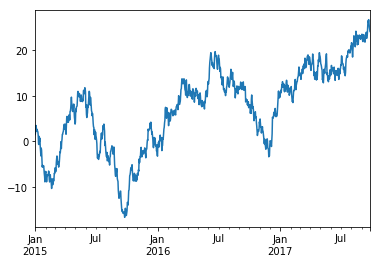

In [0]:
s = pd.Series(np.random.randn(1000), 
              index=pd.date_range('1/1/2015', periods=1000))
s = s.cumsum()
s.plot()

In [0]:
r = s.rolling(window=30)
r.mean()

2015-01-01          NaN
2015-01-02          NaN
2015-01-03          NaN
2015-01-04          NaN
2015-01-05          NaN
2015-01-06          NaN
2015-01-07          NaN
2015-01-08          NaN
2015-01-09          NaN
2015-01-10          NaN
2015-01-11          NaN
2015-01-12          NaN
2015-01-13          NaN
2015-01-14          NaN
2015-01-15          NaN
2015-01-16          NaN
2015-01-17          NaN
2015-01-18          NaN
2015-01-19          NaN
2015-01-20          NaN
2015-01-21          NaN
2015-01-22          NaN
2015-01-23          NaN
2015-01-24          NaN
2015-01-25          NaN
2015-01-26          NaN
2015-01-27          NaN
2015-01-28          NaN
2015-01-29          NaN
2015-01-30    -1.544730
                ...    
2017-08-28    21.849345
2017-08-29    21.924138
2017-08-30    21.992594
2017-08-31    22.070293
2017-09-01    22.119738
2017-09-02    22.200839
2017-09-03    22.299329
2017-09-04    22.418260
2017-09-05    22.482645
2017-09-06    22.555744
2017-09-07    22

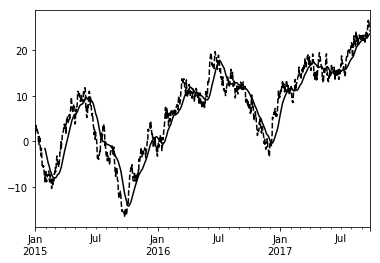

In [0]:
s.plot(style='k--')
r.mean().plot(style='k')

In [0]:
df = pd.DataFrame(np.random.randn(1000, 4),
                  index=pd.date_range('1/1/2015', periods=1000),
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f62062f3e80>,
      dtype=object)

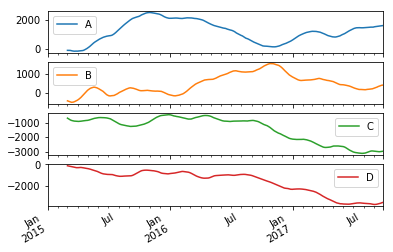

In [0]:
df.rolling(window=60).sum().plot(subplots=True)

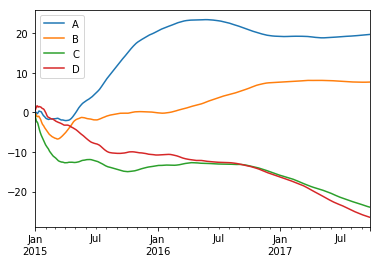

In [0]:

df.rolling(window=len(df), min_periods=1).mean().plot()

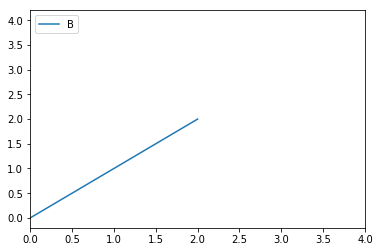

In [0]:
df = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]})
df.plot()

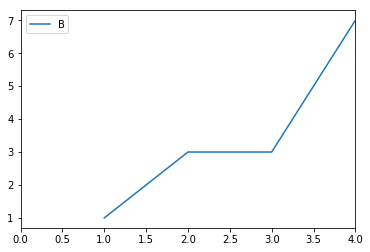

In [0]:
df.expanding(2).sum().plot()

# Plot

* kind : str
  * 'line' : line plot (default)
  * 'bar' : vertical bar plot
  * 'barh' : horizontal bar plot
  * 'hist' : histogram
  * 'box' : boxplot
  * 'kde' : Kernel Density Estimation plot
  * 'density' : same as 'kde'
  * 'area' : area plot
  * 'pie' : pie plot
  * 'scatter' : scatter plot
  * 'hexbin' : hexbin plot

In [0]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))

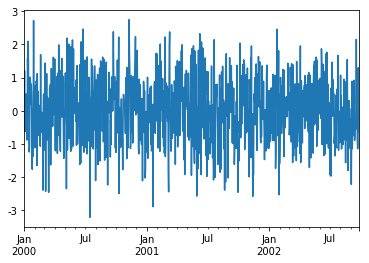

In [0]:
ts.plot()

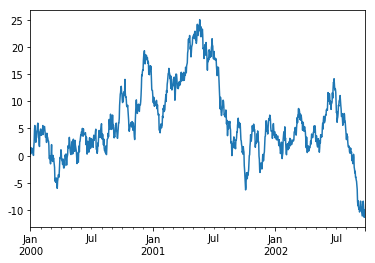

In [0]:
ts.cumsum().plot()

In [0]:
df = pd.DataFrame(np.random.randn(1000, 4),
                  index=ts.index, columns=list('ABCD'))

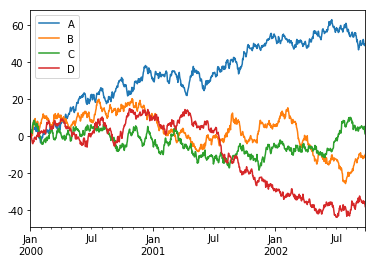

In [0]:
df.cumsum().plot()

In [0]:
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df3['A'] = pd.Series(list(range(len(df))))
df3

,B,C,A
0,0.699681,-0.025084,0
1,1.055555,0.193189,1
2,2.283549,1.884157,2
3,1.796545,3.792634,3
4,2.053770,4.873343,4
5,1.669972,4.620675,5
6,0.452724,4.615282,6
7,0.313475,4.554875,7
8,0.413079,4.390847,8
9,0.575435,3.880815,9


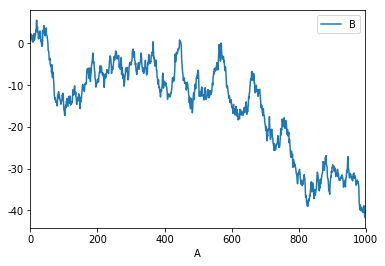

In [0]:
df3.plot(x='A', y='B')

# Bar Plot

In [0]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))
ts.head()

2000-01-01   -0.245777
2000-01-02   -1.070881
2000-01-03    0.881895
2000-01-04    0.677190
2000-01-05    0.598396
Freq: D, dtype: float64

In [0]:
df = pd.DataFrame(np.random.randn(1000, 4),
                  index=ts.index, columns=list('ABCD'))
df.head(6)

,A,B,C,D
2000-01-01,-1.083259,0.391979,-0.927421,0.561832
2000-01-02,-0.261049,-0.045478,-0.754333,-0.696030
2000-01-03,-1.305127,0.401828,-1.329864,1.048867
2000-01-04,0.029533,-0.622398,-0.341346,1.408743
2000-01-05,0.138910,1.534025,-0.090137,0.358384
2000-01-06,0.284743,-1.403160,-1.304075,-1.584363


In [0]:
df.loc['2000-01-01']

A   -1.083259
B    0.391979
C   -0.927421
D    0.561832
Name: 2000-01-01 00:00:00, dtype: float64

In [0]:
df.iloc[0]

A   -1.083259
B    0.391979
C   -0.927421
D    0.561832
Name: 2000-01-01 00:00:00, dtype: float64

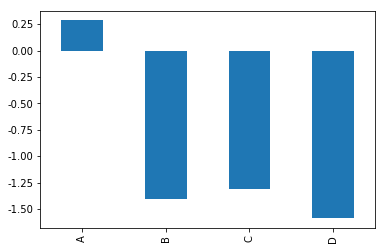

In [0]:

df.iloc[5].plot(kind='bar')

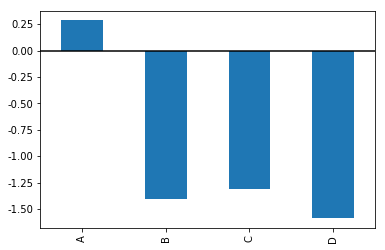

In [0]:
df.iloc[5].plot.bar()
# x 축 그리기
plt.axhline(0, color='k')

In [0]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2

,a,b,c,d
0,0.935671,0.636711,0.703017,0.501208
1,0.340281,0.118697,0.467107,0.645323
2,0.688158,0.352796,0.214481,0.089201
3,0.075057,0.576145,0.391540,0.613327
4,0.749820,0.147502,0.517389,0.300300
5,0.145699,0.360968,0.310760,0.583491
6,0.678078,0.357580,0.085120,0.156292
7,0.560495,0.193744,0.174361,0.875668
8,0.352829,0.846761,0.887268,0.949600
9,0.541404,0.356319,0.945809,0.796913


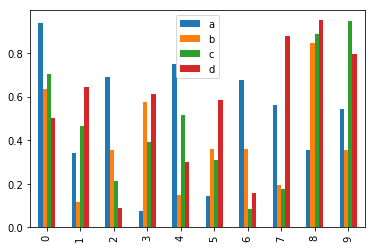

In [0]:
df2.plot.bar()

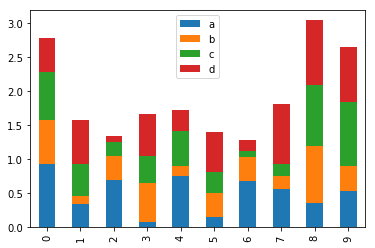

In [0]:
df2.plot.bar(stacked=True)

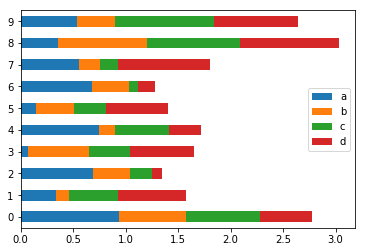

In [0]:
df2.plot.barh(stacked=True)